In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from collections import defaultdict

%matplotlib inline

In [43]:
def keymax(d):
    return max(d.items(), key=lambda x: x[1])[0]

In [84]:
NRounds = 5
total_coffee = defaultdict(float)
coffee_range = np.arange(0, 1, 0.001)
coffee_indices = np.arange(len(coffee_range), dtype=int)
for _ in range(NRounds):
    NTrips = 10000
    for trip in range(NTrips):
        _draw = np.random.permutation(coffee_indices)
        pot_size = 1
        poured = 0
        for ind in _draw:
            take = coffee_range[ind]
            if take + poured > pot_size:
                poured = pot_size
                pot_size += 1
            else:
                total_coffee[ind] += take
                poured += take

    best_choice = coffee_range[keymax(total_coffee)]  # find the best one from last run
    # add many more of this choice
    coffee_range = np.append(coffee_range, [best_choice]*100)
    coffee_indices = np.append(coffee_indices, np.arange(coffee_indices.max(),
                                                         coffee_indices.max()+100,
                                                         dtype=int))
    

In [85]:
print(keymax(total_coffee))
print(coffee_range[keymax(total_coffee)])

999
0.999


In [83]:
total_coffee[999]

36432.531000006376

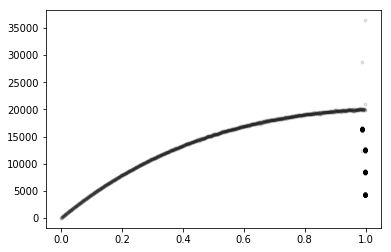

In [80]:
plt.plot(coffee_range[list(total_coffee.keys())],
         list(total_coffee.values()), 'k.', alpha=0.1)

In [91]:
NRounds = 5
coffee_trips = defaultdict(list)
coffee_range = np.arange(0, 1, 0.001)
coffee_indices = np.arange(len(coffee_range), dtype=int)
for _ in range(NRounds):
    NTrips = 10000
    for trip in range(NTrips):
        _draw = np.random.permutation(coffee_indices)
        pot_size = 1
        poured = 0
        for ind in _draw:
            take = coffee_range[ind]
            if take + poured > pot_size:
                poured = pot_size
                pot_size += 1
                coffee_trips[ind].append(0)
            else:
                coffee_trips[ind].append(take)
                poured += take

    best_choice = max([(k, np.mean(c)) for k, c in coffee_trips.items()], key=lambda x: x[1])
    best_choice = coffee_range[best_choice[0]]
    #best_choice = coffee_range[keymax(total_coffee)]  # find the best one from last run
    # add many more of this choice
    coffee_range = np.append(coffee_range, [best_choice]*100)
    coffee_indices = np.append(coffee_indices, np.arange(coffee_indices.max(),
                                                         coffee_indices.max()+100,
                                                         dtype=int))
    

In [92]:
max([(k, np.mean(c)) for k, c in coffee_trips.items()], key=lambda x: x[1])

(1312, 0.42893550000000003)

In [93]:
coffee_range[1312]

0.94500000000000006